In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)
library(skimr)
library(lubridate)
library(ggpubr)
library(ggplot2)
library("ggsci")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#list.files(path = "../input")
options(warn=-1)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Fitness Tracker Data Analysis using R

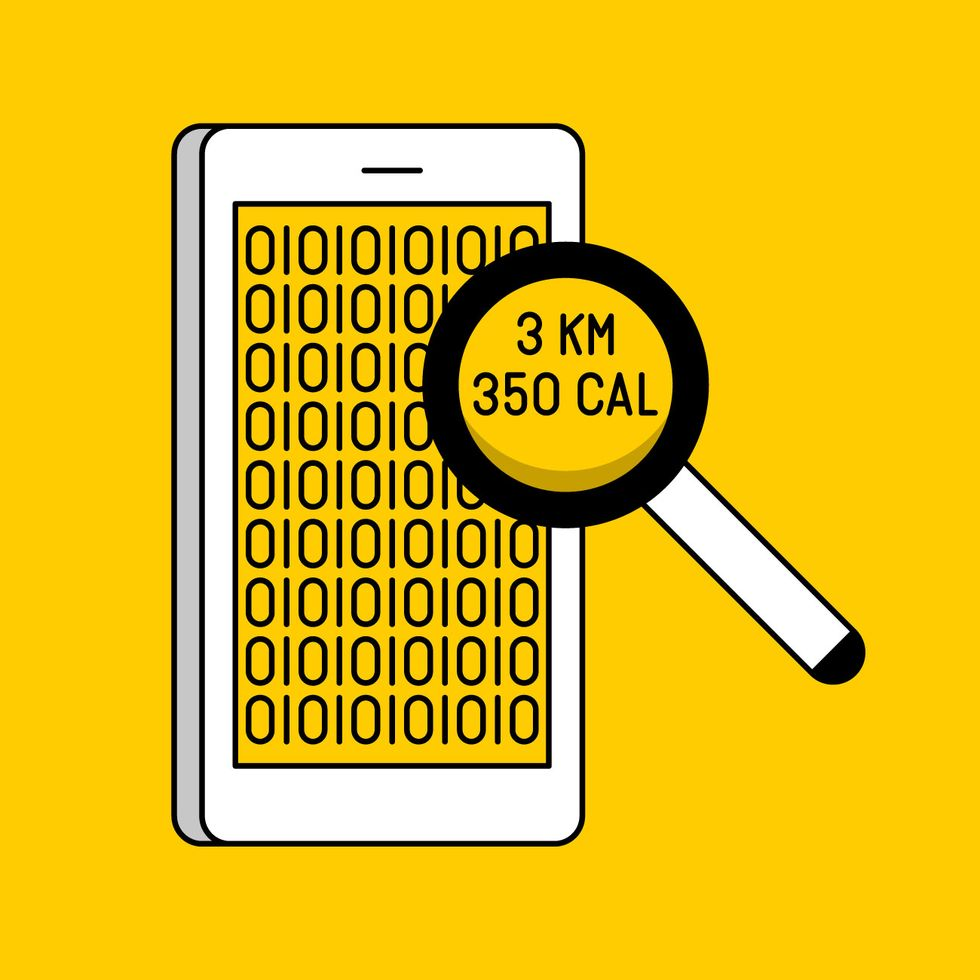

# ABOUT

### This case study analyzes the trends in Fitbit usage amoung 30 users. The data includes details of physical activity, heart rate and sleep patterns of the users collected over a period of 2 months. The case study is divided into sections based on some questions about the data which are answered using R 

#### Dataset : https://www.kaggle.com/arashnic/fitbit

In [2]:
daily_activity<-read.csv("../input/fitness/dailyActivity_merged.csv")
sleep_day <- read.csv("../input/fitness/sleepDay_merged.csv")
hourlySteps <- read.csv("../input/fitness/hourlySteps_merged.csv")

### SUMMARY STATISTICS OF THE DATA USED

In [3]:
daily_activity %>% 
select(TotalSteps, TotalDistance, SedentaryMinutes) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

In [4]:
sleep_day %>% 
select(TotalMinutesAsleep, TotalTimeInBed) %>%
summary()

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

In [5]:
hourlySteps %>% 
select(StepTotal) %>%
summary()

   StepTotal      
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   40.0  
 Mean   :  320.2  
 3rd Qu.:  357.0  
 Max.   :10554.0  

## Which day of the week do people walk the most?

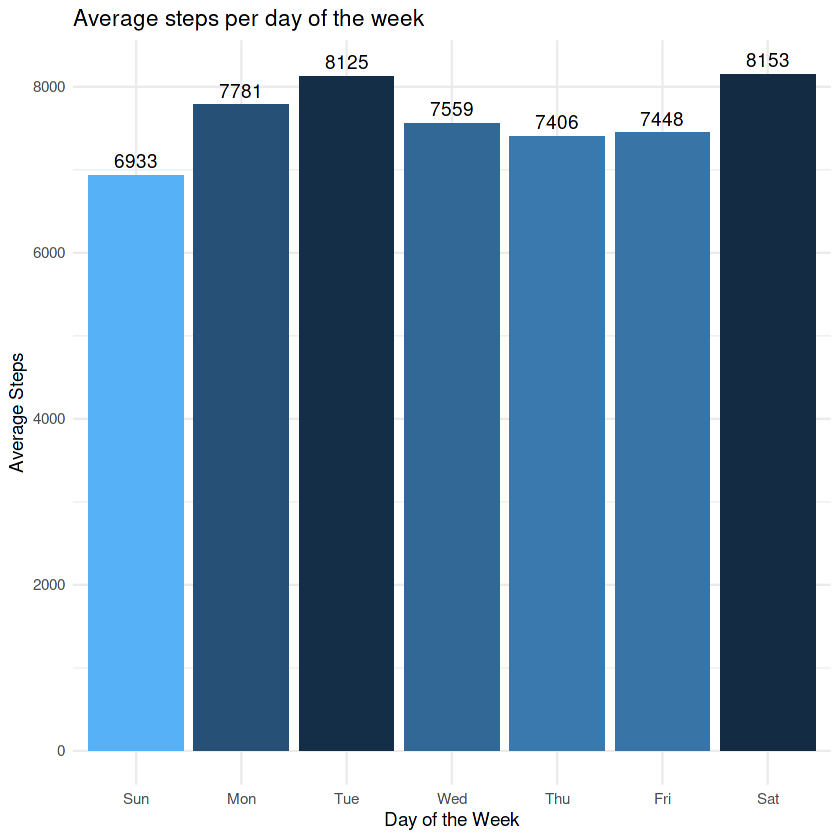

In [6]:
daily_activity$new_date <- mdy(daily_activity$ActivityDate) 
daily_activity$day_of_week <- wday(daily_activity$new_date, label=TRUE)

steps_bar_data <- daily_activity %>% 
  group_by(DayOfTheWeek = day_of_week) %>%
  summarise(AverageSteps = round(mean(TotalSteps)))

ggplot(data = steps_bar_data, aes(x=DayOfTheWeek, y=AverageSteps,fill=-AverageSteps)) + 
  geom_bar(stat = "identity") +
  geom_col() +
  labs(title = "Average steps per day of the week",x = "Day of the Week", y = "Average Steps") +
  theme_minimal() +
  geom_text(aes(label = AverageSteps), vjust = -0.5) +
  theme(legend.position = "none") 

## Which time of the day do people excercise the most?

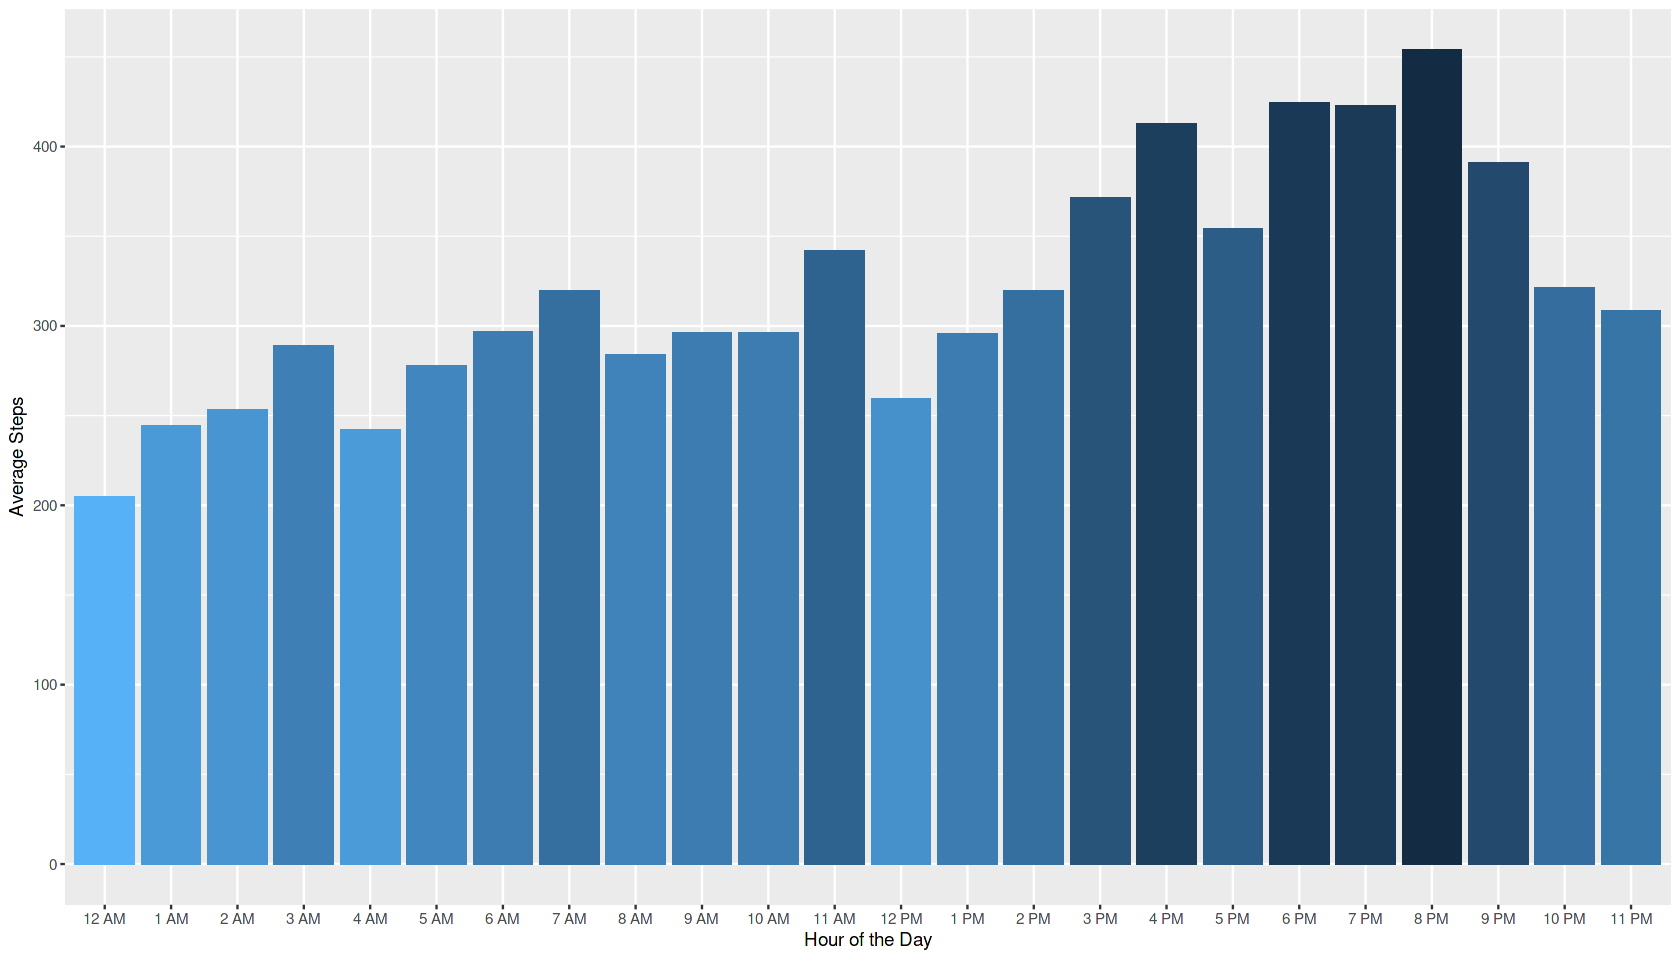

In [7]:
hourlySteps_modified <- hourlySteps %>%
  group_by(ActivityHour) %>%
  summarise(AvgSteps = mean(StepTotal),totalsteps = sum(StepTotal))

level_order <- factor(hourlySteps_modified$ActivityHour, level = c('12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'))

options(repr.plot.width = 14, repr.plot.height = 8,warn=-1)

ggplot(data = hourlySteps_modified, aes(x=level_order, y=AvgSteps,fill=-AvgSteps)) +
  geom_col(stat = "identity") +
  theme(legend.position = "none") +
  labs(x = "Hour of the Day", y = "Average Steps")


## What is trend in intensity of the physical activity? 

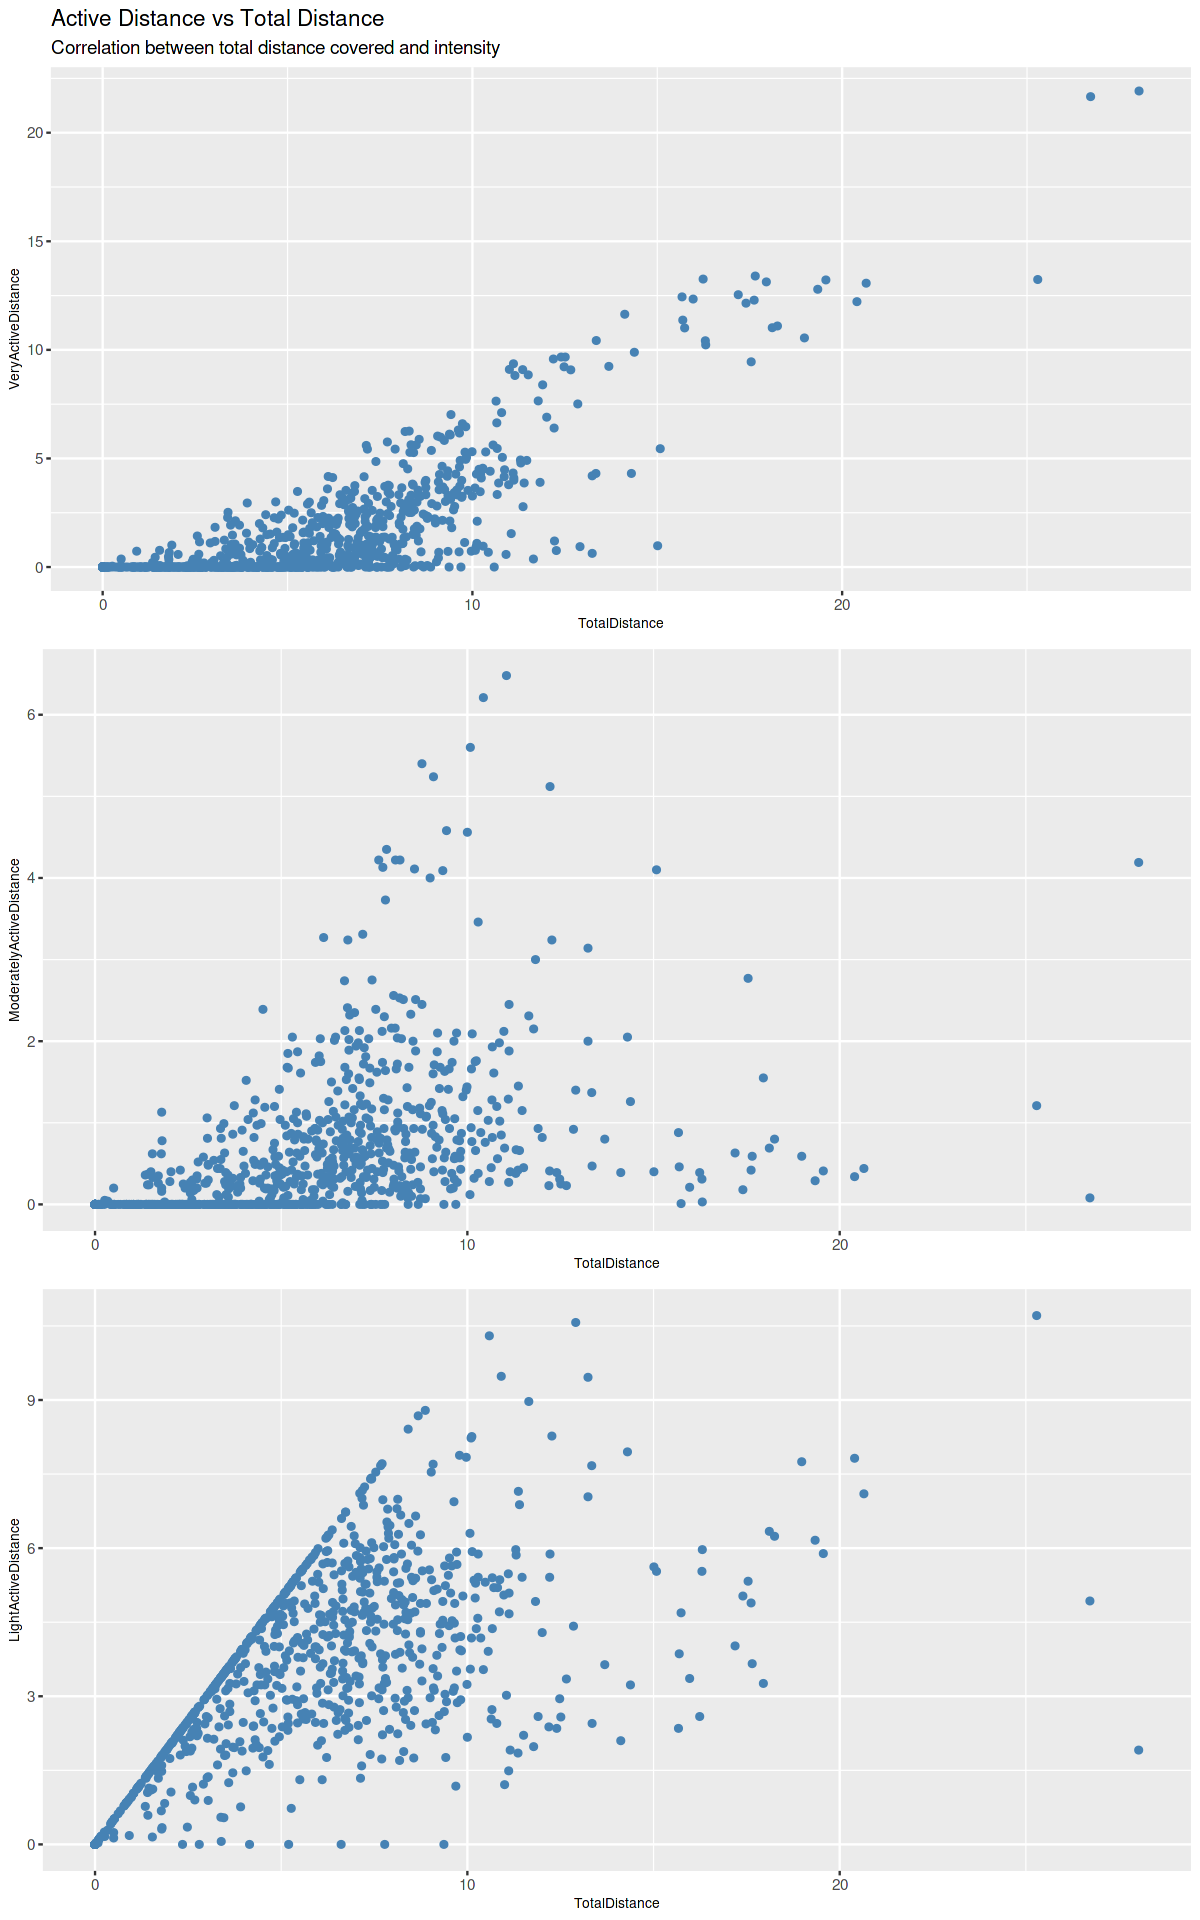

In [8]:
  options(repr.plot.width = 10, repr.plot.height = 16,warn=-1)
  va <- ggplot(data = daily_activity) +
  geom_point(mapping =  aes(x= TotalDistance, y = VeryActiveDistance) ,colour = "steelblue")+
  theme(axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8))+
  labs(title = "Active Distance vs Total Distance ",
       subtitle = "Correlation between total distance covered and intensity")
  ma <-ggplot(data = daily_activity) +
  geom_point(mapping =  aes(x= TotalDistance, y = ModeratelyActiveDistance) ,colour = "steelblue")+
  theme(axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8))
  la <-ggplot(data = daily_activity) +
  geom_point(mapping =  aes(x= TotalDistance, y = LightActiveDistance) ,colour = "steelblue")+
  theme(axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8))

  ggarrange(va, ma, la ,
          ncol = 1, 
          nrow = 3)

## Do people burn more calories if they walk more?

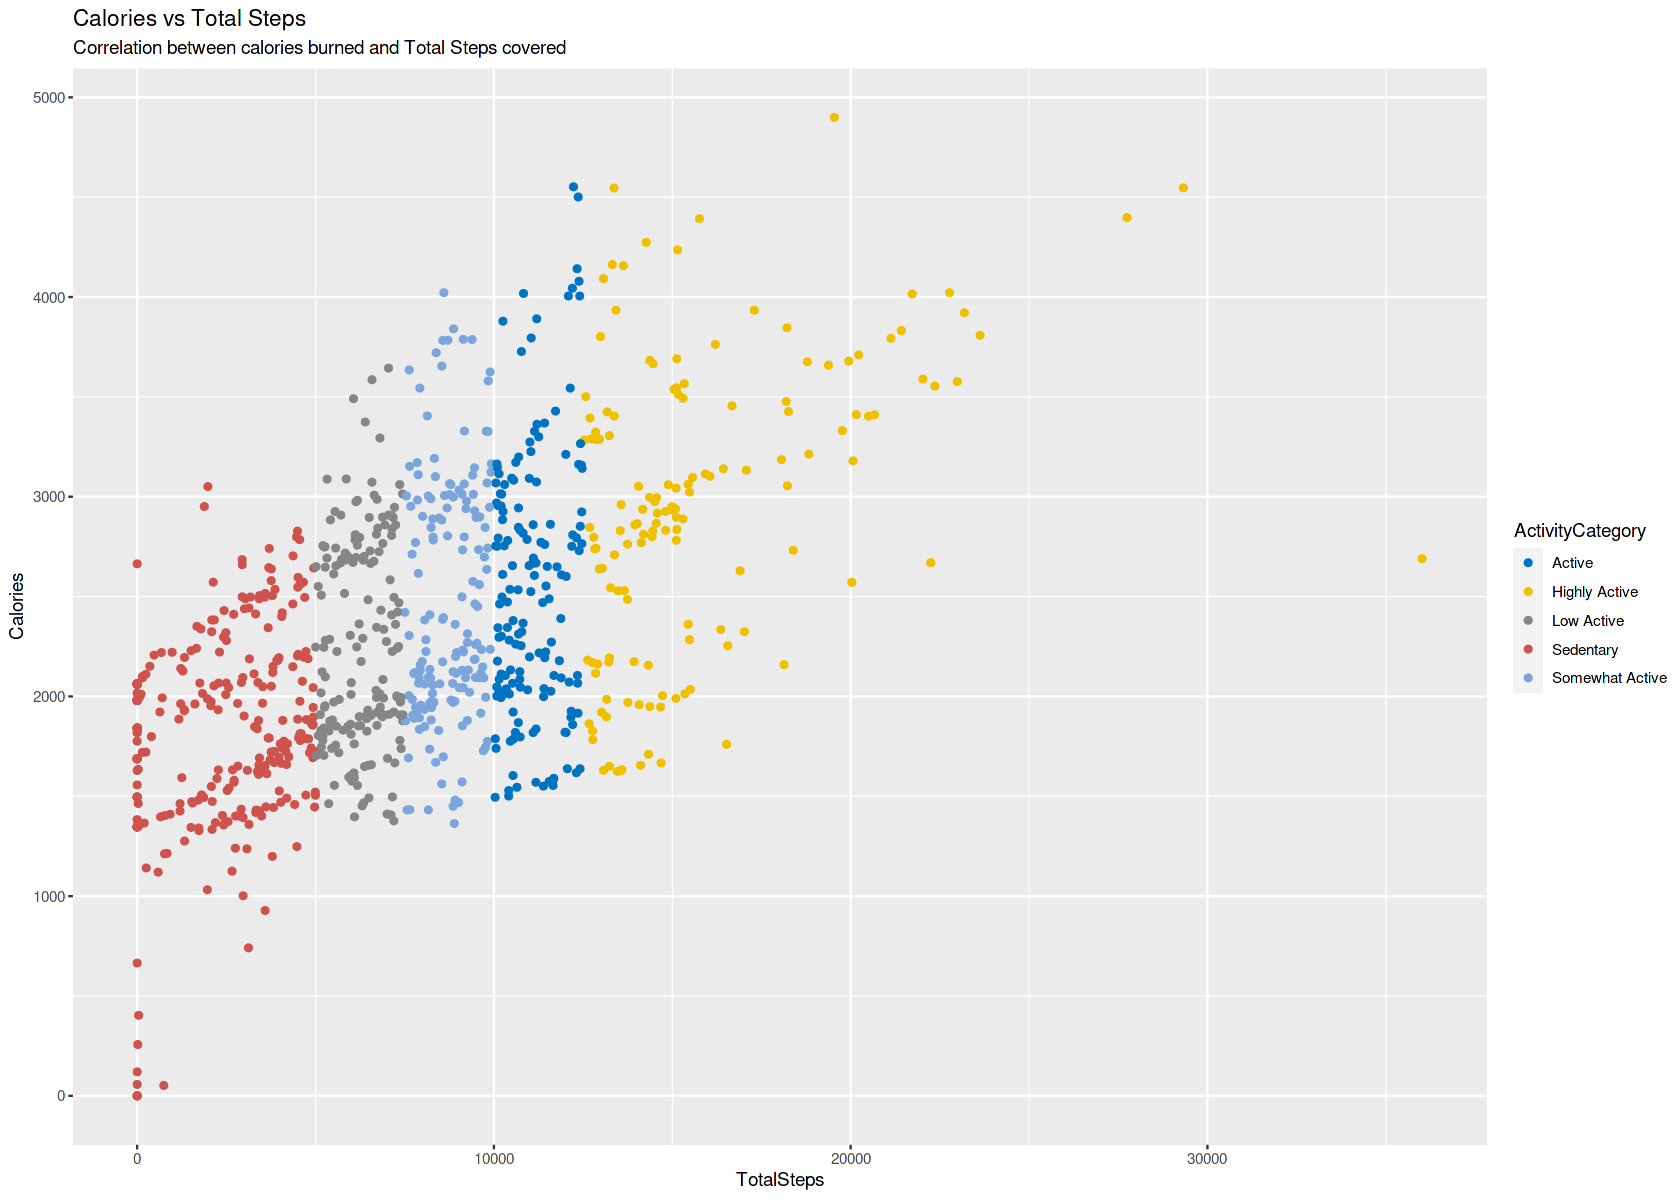

In [9]:
options(repr.plot.width = 14, repr.plot.height = 10,warn=-1)
daily_activity_modified <- daily_activity %>%  
  mutate(ActivityCategory = case_when(
    .$TotalSteps < 5000 ~ "Sedentary",
    .$TotalSteps >= 5000 & .$TotalSteps < 7500 ~ "Low Active",
    .$TotalSteps >= 7500 & .$TotalSteps < 10000 ~ "Somewhat Active",
    .$TotalSteps >= 10000 & .$TotalSteps < 12500 ~ "Active",
    .$TotalSteps >= 12500 ~ "Highly Active"
  ))

  ggplot(data = daily_activity_modified) +
  geom_point(mapping =  aes(x= TotalSteps, y = Calories ,color = ActivityCategory)) +
  labs(title = "Calories vs Total Steps ",
       subtitle = "Correlation between calories burned and Total Steps covered")+
scale_color_jco()

## Are most people active?

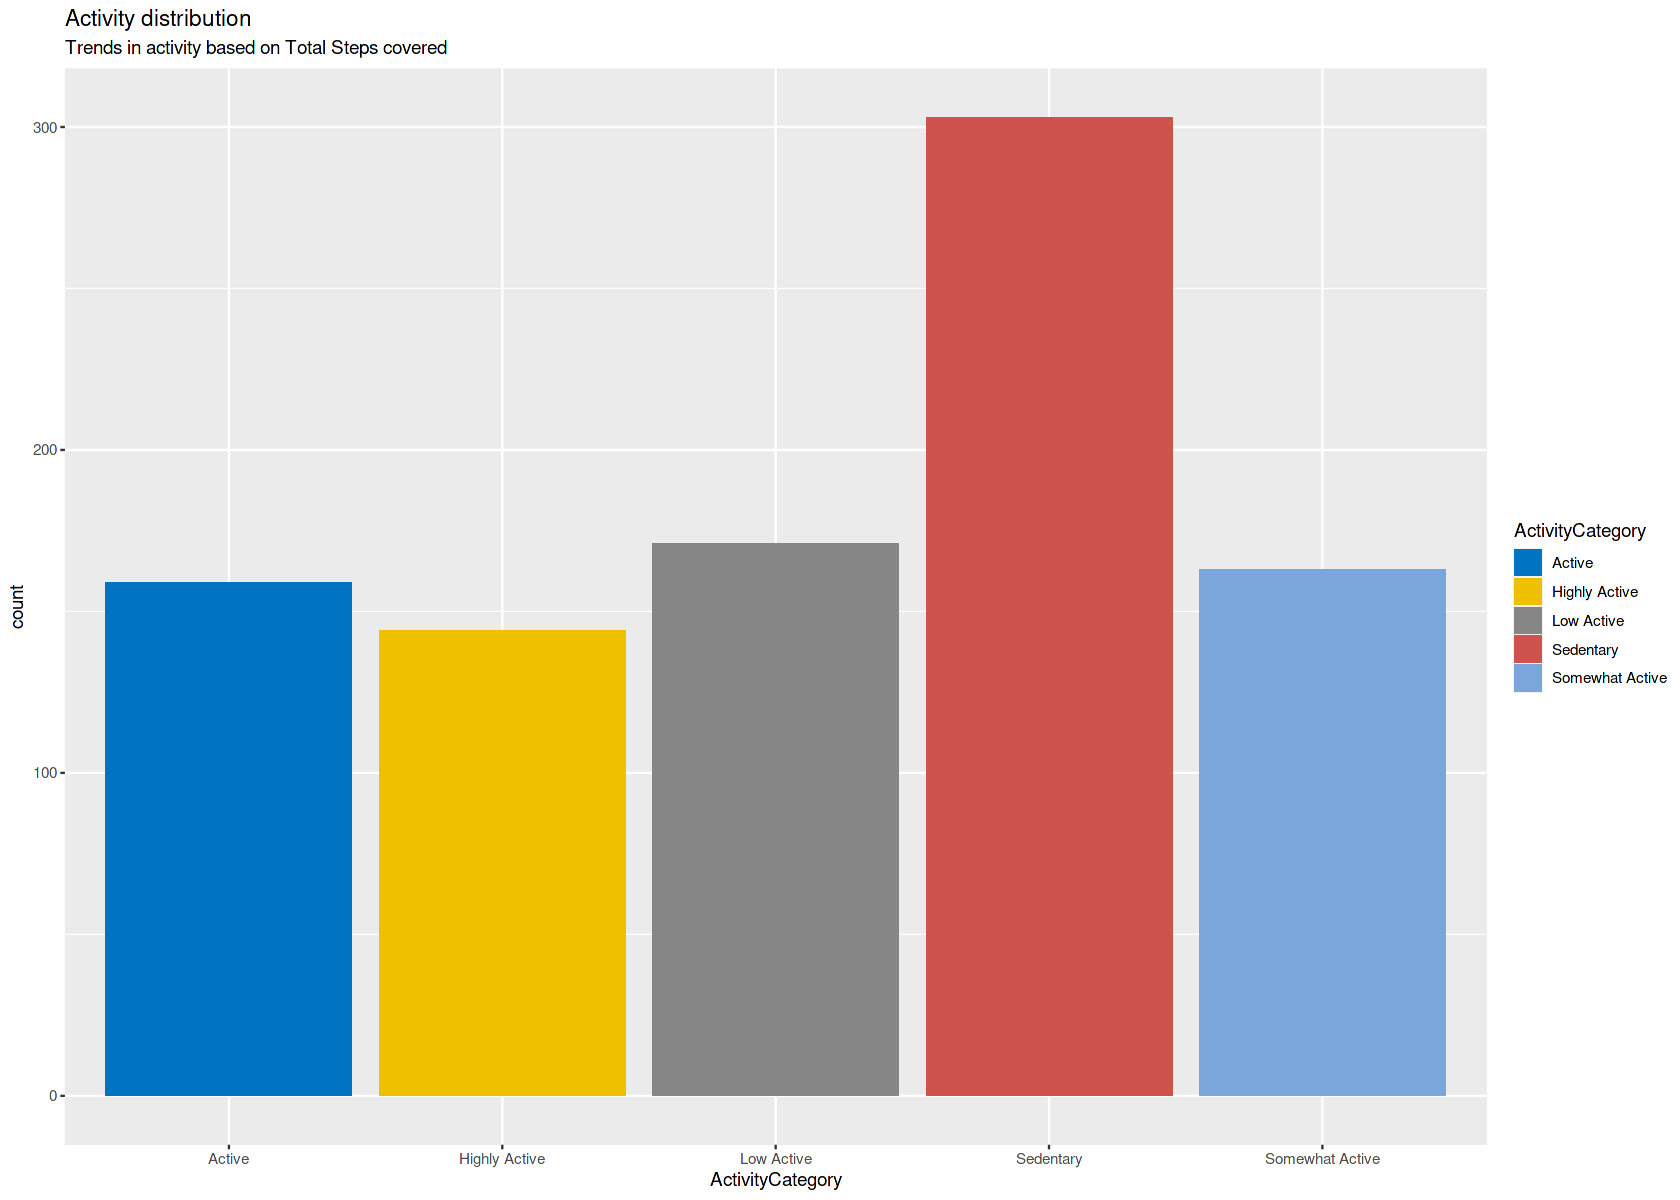

In [10]:
TotalSteps_distribution <- daily_activity_modified %>%
  group_by(ActivityCategory)
  
ggplot(data = TotalSteps_distribution) +
  geom_bar(mapping = aes(x=ActivityCategory,fill=ActivityCategory)) +
  labs(title = "Activity distribution",
       subtitle = "Trends in activity based on Total Steps covered") +
scale_fill_jco()

## Do people who exerscise more also rest more?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



NULL

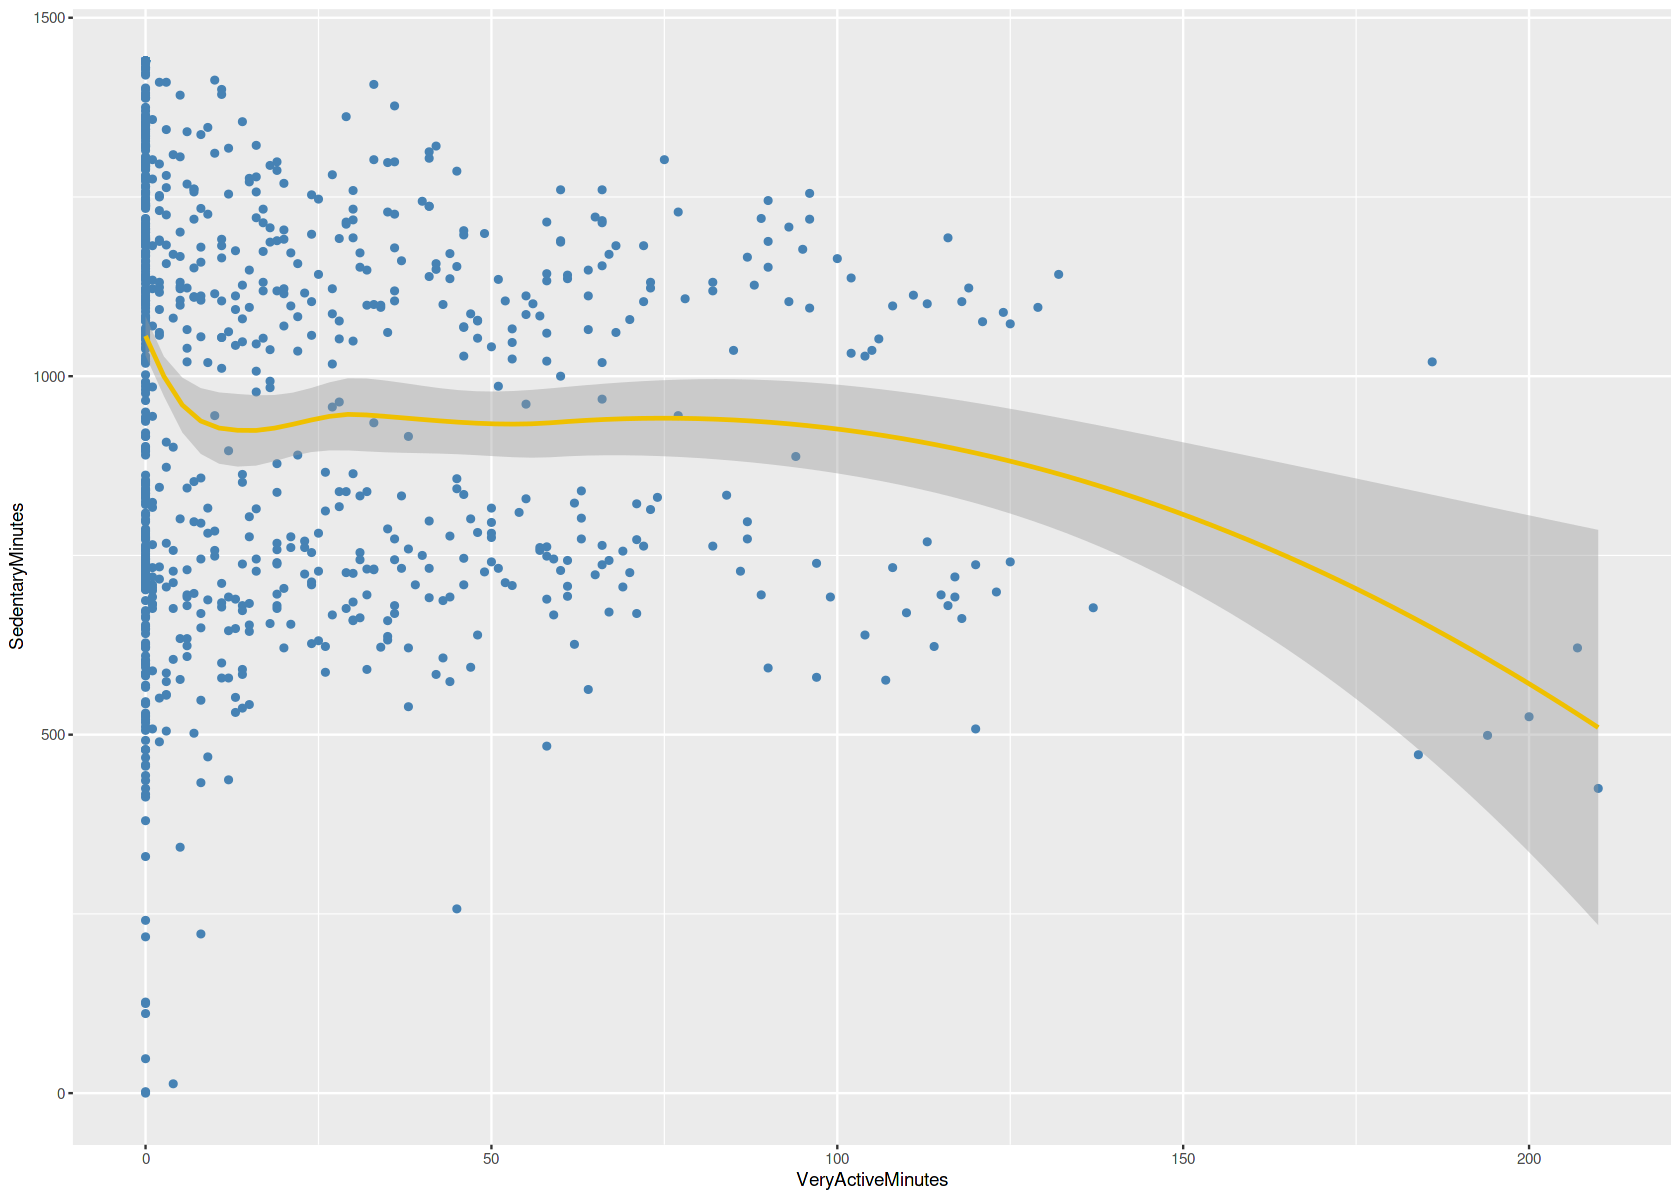

In [11]:

ggplot(data = daily_activity_modified) +
  geom_point(mapping =  aes(x= VeryActiveMinutes, y = SedentaryMinutes),colour = "steelblue")+
  geom_smooth(mapping =  aes(x= VeryActiveMinutes, y = SedentaryMinutes),colour = "#EFC000FF")
  labs(title = "Calories vs Total Steps ",
       subtitle = "Correlation between calories burned and Total Steps covered") +
  scale_color_jco()
options(warn=-1)